# __OSM2GMNS Quickstart Notebook__

OSM2GMNS is a Python package that helps generate high-fidelity mesoscopic transportation network models from OpenStreetMap data. This enables even the smallest transportation authorities to begin analysis with a high quality network model for future analysis.


# 1. Data Collection
We rely on a few open-source projects to gather the raw data to start our analysis. Export data from your area of interest from the following sources.
 * __OpenStreetMap base map__: https://www.openstreetmap.org/export
   * __Geofabrik__: Alternative for non-rectangular Areas of Interest: http://download.geofabrik.de/
 * __Bike Transport Info__ (Optional):  https://extract.bbbike.org

For this demonstration, we'll use sample data from the ASU Transit AI Lab Github

osm2gmns also enables users to download OSM data within the region of interest using a built-in function. A region can be a state, city, or even university. On OpenStreetMap homepage, search the region name to get its unique relation id. The following example shows how to download Tempe city OSM data using function downloadOSMData.

https://www.openstreetmap.org/#map=18/33.42141/-111.93472&layers=DG

# 2. Install the osm2gmns/shapely package
pip install osm2gmns<br>
pip install shapey

# 3. Create a network model from OpenStreetMap exports

In [1]:
# Import osm2gmns with the alias as "og" (easier to type)
import osm2gmns as og
# relation id for Manhattan  is 8398124
# relation id for City of Tempe is 110833.
# relation id for Bullhead city is 6695742
og.downloadOSMData(2467159, 'map.osm')
# Generate a net from the Tempe, AZ OpenStreetMap export and include Points of Interest (POI=True)


osm2gmns, 0.7.3
valid reponses got from API server.
receving data...
map data has been written to map.osm


arguments used for network parsing:
  filename: map.osm
  network_types: walk
  link_types: all
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 1902, number of links: 3266, number of pois: 0


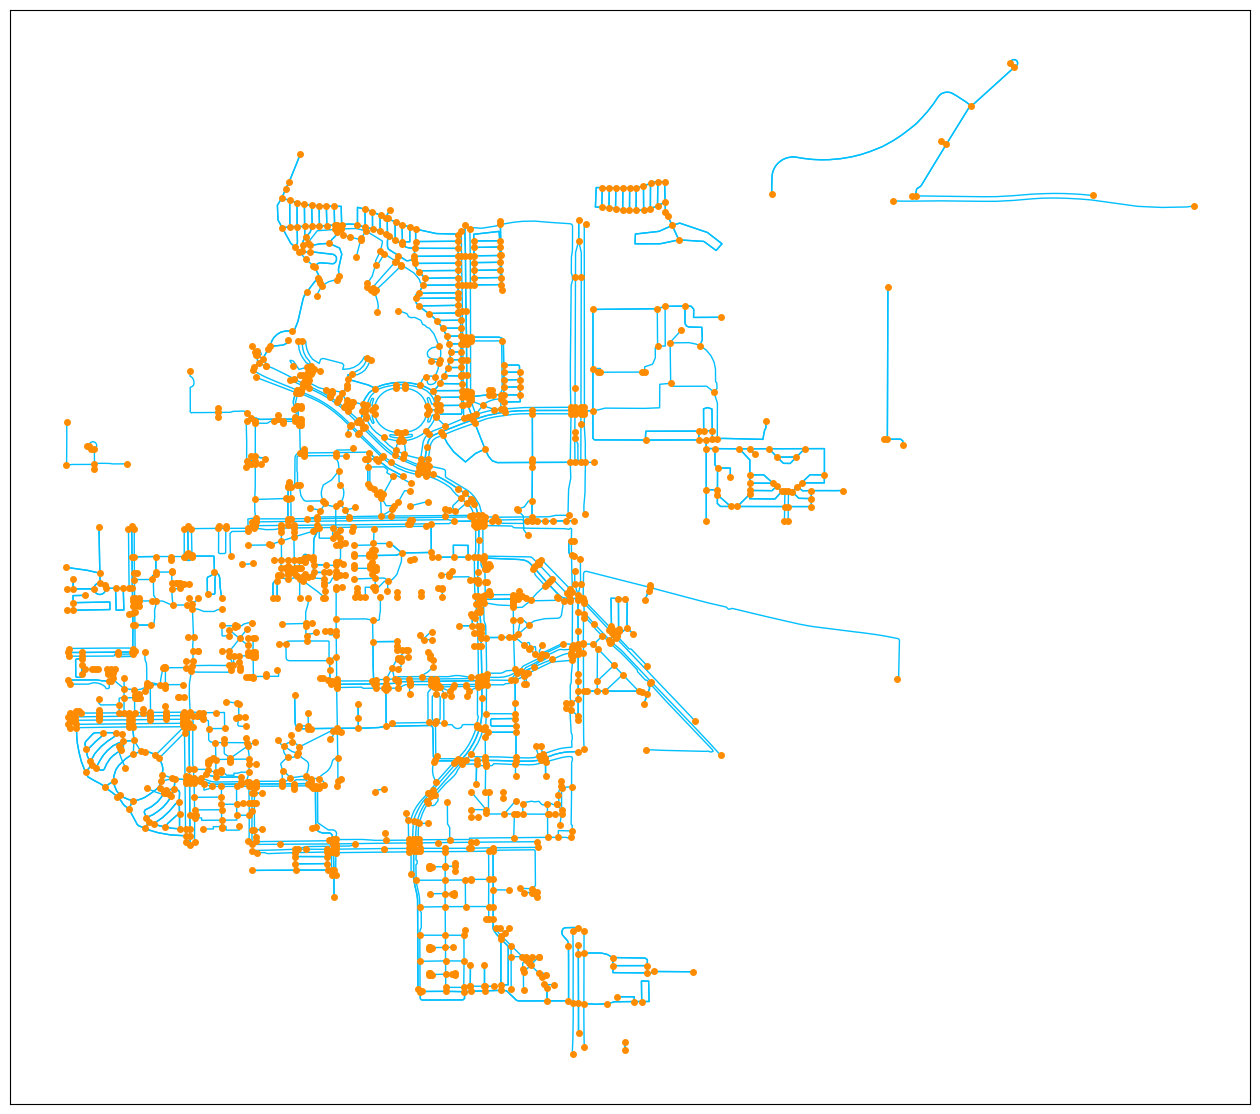

In [3]:
input_file = 'map.osm'
net = og.getNetFromFile(input_file, network_types=('walk'))

# Use og.show(net) to visualize the network model
og.show(net)

In [4]:
og.outputNetToCSV(net) #net

Outputting Network Files


In [14]:
import pandas as pd

link_dataframe = pd.read_csv("link.csv")
link_dataframe.head()
link_dataframe.shape

(136, 18)

#4. Modify the network model

## Example: Consolidate Complex Intersections
Intersections can have lots of nodes representing different turn lanes, crosswalks, etc.

Using og.consolidateComplexIntersections(net), we can combine nodes in intersections into a single node to make analysis faster and simpler

Consolidating Complex Intersections
    0 intersections have been consolidated


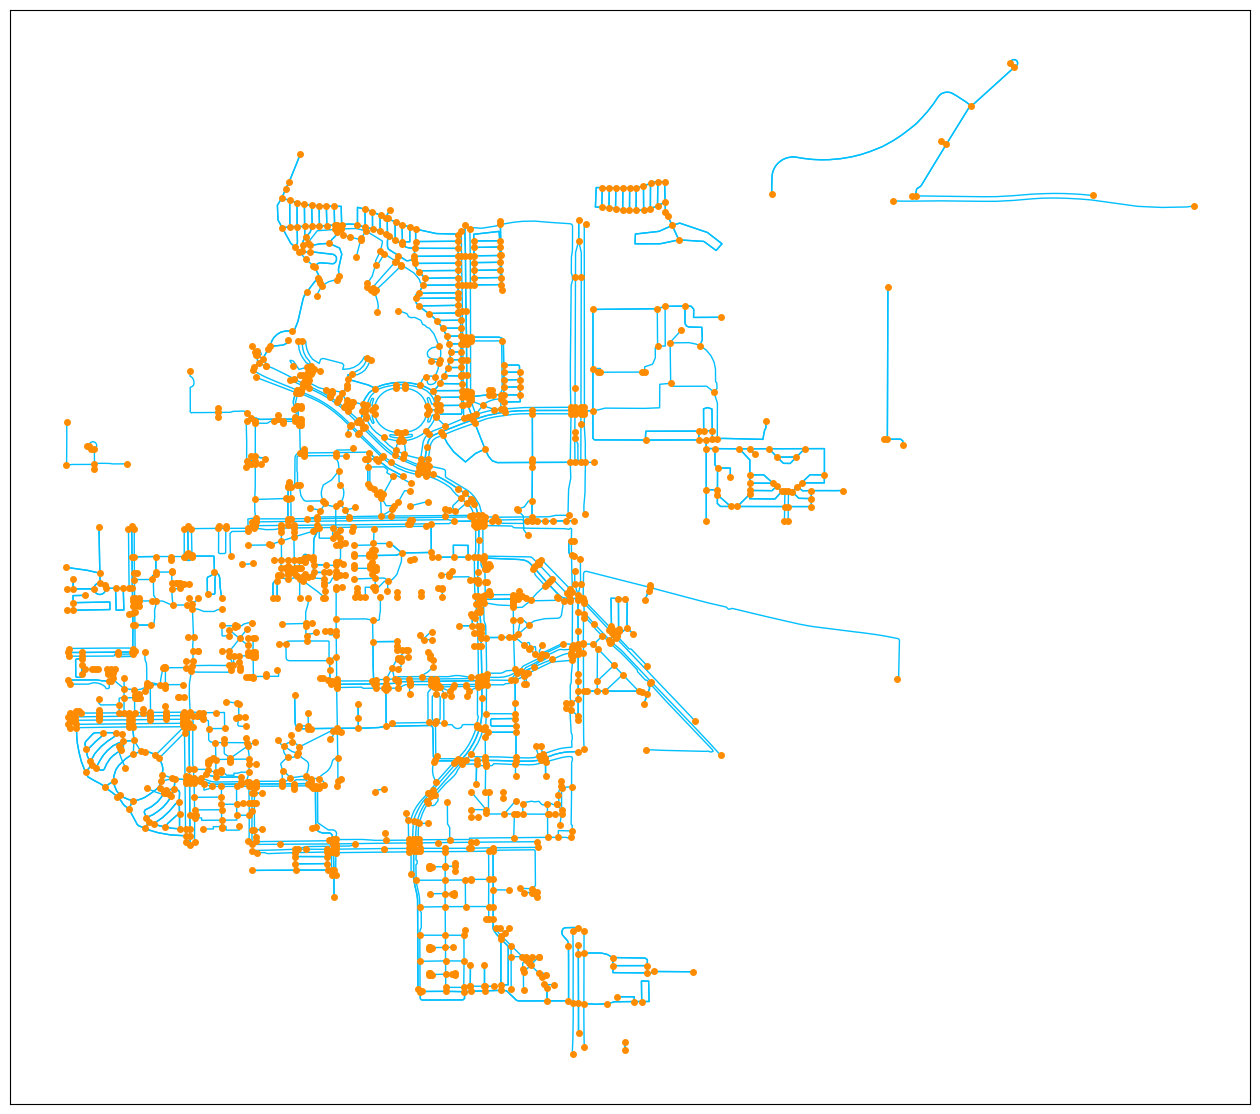

In [6]:
og.consolidateComplexIntersections(net)
og.show(net)

## Example: Points of Interest

We can connect Points of Interest (POIs) to the network model. Nodes representing the center (centroids) of POIs are generated. These nodes are connected with a link to the nearest node on the rest of the network

arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary', 'secondary')
  POI: True
  POI_sampling_ratio: 0.05
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
    generating POIs
  number of nodes: 66, number of links: 82, number of pois: 27


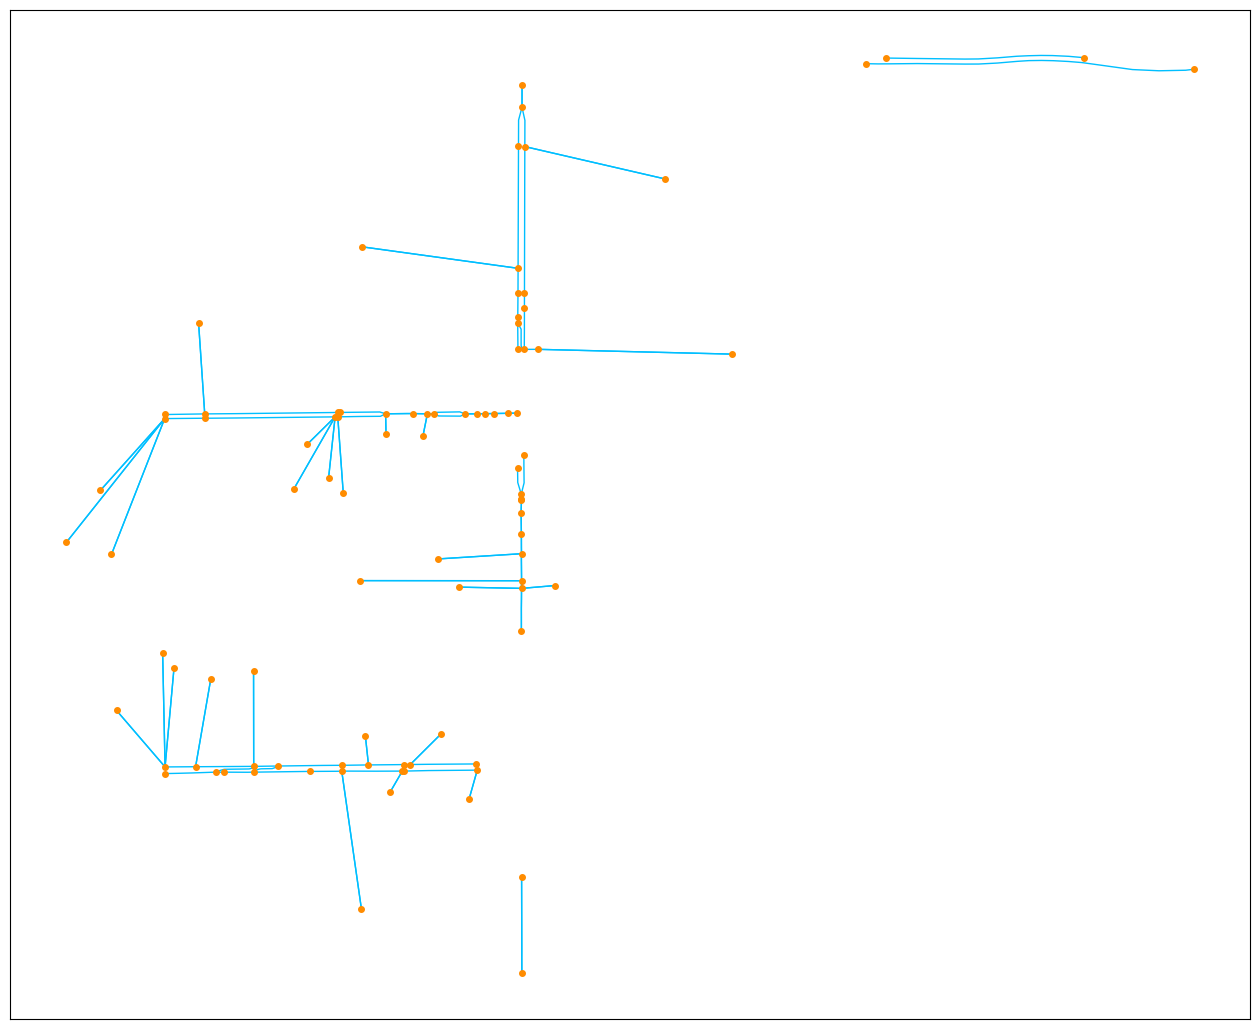

In [7]:
net = og.getNetFromFile('map.osm', link_types=('motorway','trunk','primary','secondary'), POI=True, POI_sampling_ratio=0.05)
og.connectPOIWithNet(net)
og.show(net)

#5. Export transportation network model

We can export our transportation network model to a CSV format for ease of use in further analysis with other systems.

og.outputNetToCSV(...) will generate two files: node.csv representing nodes, and link.csv representing links (edges) between nodes.

In [9]:
og.outputNetToCSV(net) #net

Outputting Network Files


In [10]:
"""
Take a peek at the format of the CSVs using the Pandas library
Loading the CSV files gives us a DataFrame object which is very heavily used in
data science and analysis.

For more information on how this data is organized, check out the GMNS specification

https://github.com/zephyr-data-specs/GMNS/pull/54

"""

import pandas as pd

node_dataframe = pd.read_csv("node.csv")
node_dataframe.head()

,name,node_id,osm_node_id,osm_highway,zone_id,ctrl_type,node_type,activity_type,is_boundary,x_coord,y_coord,intersection_id,poi_id,notes
0,NaN,0,4.152970e+07,traffic_signals,NaN,signal,NaN,NaN,NaN,-111.926223,33.424501,NaN,NaN,NaN
1,NaN,1,5.133355e+09,NaN,NaN,NaN,NaN,NaN,NaN,-111.926215,33.427509,NaN,NaN,NaN
2,NaN,2,9.637510e+09,NaN,NaN,NaN,NaN,NaN,NaN,-111.926387,33.424014,NaN,NaN,NaN
3,NaN,3,2.704830e+09,NaN,NaN,NaN,NaN,NaN,NaN,-111.926388,33.423883,NaN,NaN,NaN
4,NaN,4,8.122989e+09,NaN,NaN,NaN,NaN,NaN,NaN,-111.926382,33.423342,NaN,NaN,NaN


In [11]:
link_dataframe = pd.read_csv("link.csv")
link_dataframe.head()

,name,link_id,osm_way_id,from_node_id,to_node_id,dir_flag,length,lanes,free_speed,capacity,link_type_name,link_type,geometry,allowed_uses,from_biway,is_link,VDF_fftt1,VDF_cap1
0,South Rural Road,0,264834598.0,0,1,1,333.54,3.0,56.0,NaN,primary,3,"LINESTRING (-111.9262230 33.4245011, -111.9262...",auto,0,0,NaN,NaN
1,South Rural Road,1,264834600.0,2,3,1,14.54,4.0,56.0,NaN,primary,3,"LINESTRING (-111.9263865 33.4240145, -111.9263...",auto,0,0,NaN,NaN
2,South Rural Road,2,264834600.0,3,4,1,60.04,4.0,56.0,NaN,primary,3,"LINESTRING (-111.9263882 33.4238834, -111.9263...",auto,0,0,NaN,NaN
3,NaN,3,264834603.0,3,5,1,65.40,1.0,NaN,NaN,primary,3,"LINESTRING (-111.9263882 33.4238834, -111.9263...",auto,0,1,NaN,NaN
4,NaN,4,264834603.0,5,6,1,31.61,1.0,NaN,NaN,primary,3,"LINESTRING (-111.9262287 33.4233394, -111.9261...",auto,0,1,NaN,NaN


In [12]:
link_dataframe = pd.read_csv("poi.csv")
link_dataframe.head()

,name,poi_id,osm_way_id,osm_relation_id,building,amenity,leisure,way,geometry,centroid,area,area_ft2
0,Lattie F. Coor Hall,0,NaN,12350155.0,yes,NaN,NaN,NaN,"POLYGON ((-111.9378915 33.4191281, -111.937302...",POINT (-111.9373582 33.41937),4828.9,51978.0
1,NaN,1,1.078715e+09,NaN,yes,NaN,NaN,NaN,"POLYGON ((-111.9287899 33.4213122, -111.928792...",POINT (-111.9286924 33.4215545),986.7,10620.5
2,NaN,2,5.526349e+08,NaN,NaN,NaN,park,NaN,"POLYGON ((-111.9350406 33.4170018, -111.934932...",POINT (-111.9350181 33.4171008),208.5,2244.7
3,Acacia Hall,3,3.040799e+07,NaN,residential,NaN,NaN,NaN,"POLYGON ((-111.9302754 33.4151914, -111.930275...",POINT (-111.9300913 33.4153932),1049.5,11296.8
4,NaN,4,1.130709e+09,NaN,roof,NaN,NaN,NaN,"POLYGON ((-111.9285419 33.4154682, -111.928539...",POINT (-111.9282459 33.4154367),375.9,4046.3


#6. Basic analysis with Pandas

The node and link files are in CSV format, which can be used with a wide variety of programming languages, such as R, and programs, such as Excel.

Here, we show a quick demonstration of some simple analysis using Python

In [13]:
# From the previous cells, we have pandas DataFrame objects representing the node and link data for our model
print(node_dataframe.head(), link_dataframe.head())

   name  node_id   osm_node_id      osm_highway  zone_id ctrl_type  node_type  \
0   NaN        0  4.152970e+07  traffic_signals      NaN    signal        NaN   
1   NaN        1  5.133355e+09              NaN      NaN       NaN        NaN   
2   NaN        2  9.637510e+09              NaN      NaN       NaN        NaN   
3   NaN        3  2.704830e+09              NaN      NaN       NaN        NaN   
4   NaN        4  8.122989e+09              NaN      NaN       NaN        NaN   

   activity_type  is_boundary     x_coord    y_coord  intersection_id  poi_id  \
0            NaN          NaN -111.926223  33.424501              NaN     NaN   
1            NaN          NaN -111.926215  33.427509              NaN     NaN   
2            NaN          NaN -111.926387  33.424014              NaN     NaN   
3            NaN          NaN -111.926388  33.423883              NaN     NaN   
4            NaN          NaN -111.926382  33.423342              NaN     NaN   

   notes  
0    NaN  
1   